In [1]:
%matplotlib inline
import math
import random

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

import numpy as np
import tensorflow as tf

sns.set(style="ticks", color_codes=True)

In [2]:
data = pd.read_csv("./data/NYCnumber.csv", sep=',')
print data.head()

        1       3       4    17    19    24    27    28           29        31
0  1282.0  2835.0  3463.0   7.3  31.5  16.2  52.2   7.7  103446100.0  410400.0
1  1491.0  2015.0  1262.0   5.3  17.4   2.2  61.1   6.1  150492800.0  354100.0
2   920.0  2455.0  2569.0   5.3   8.1  10.9  45.7   9.2   93610300.0  418300.0
3  1126.0  3167.0  1676.0   2.7  38.0  20.1  52.2  19.4   36375100.0  360000.0
4   601.0  3961.0  3578.0  34.0  24.7   4.6  42.5  12.6  110563800.0  370800.0


In [3]:
# convert housing data to numpy format
data_array = data.as_matrix().astype(float)
# split data into feature and target sets
X = data_array[:, :-1]
y = data_array[:, -1]
# normalize the data per feature by dividing by the maximum value in each column
X = X / X.max(axis=0)
y = y / 1000

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint

# model hyperparameters
batch_size = 256
nb_epoch = 500

num_hidden_1 = 1024
num_hidden_2 = 1024
num_hidden_3 = 1024
dropout = 0.15

Using Theano backend.


In [5]:
model = Sequential()

model.add(Dense(output_dim=num_hidden_1, input_dim=X.shape[1], W_regularizer=l2(0.0005)))
model.add(Activation("tanh"))
model.add(Dropout(dropout))
model.add(Dense(num_hidden_2, W_regularizer=l2(0.0005)))
model.add(Activation("tanh"))
model.add(Dropout(dropout))
model.add(Dense(num_hidden_3, W_regularizer=l2(0.0005)))
model.add(Activation("tanh"))
model.add(Dropout(dropout))
model.add(Dense(1)) # single neuron in output layer for regression problem

# save out model each time it performs better than previous epochs
checkpoint_name = "-model_keras-regression.hdf5"
checkpointer = ModelCheckpoint(checkpoint_name, verbose=0, save_best_only=True)

# mean squared logarithmic error for regression problme
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')

# fit model using a 25% validation split (keras will automatically split the data into training and validation sets)
history = model.fit(X, y, validation_split=0.25, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=2, callbacks=[checkpointer])

Train on 1283 samples, validate on 428 samples
Epoch 1/500
0s - loss: 21.0868 - val_loss: 6.5639
Epoch 2/500
0s - loss: 7.6496 - val_loss: 5.1981
Epoch 3/500
0s - loss: 6.8303 - val_loss: 4.7373
Epoch 4/500
0s - loss: 6.3792 - val_loss: 4.3590
Epoch 5/500
0s - loss: 5.9978 - val_loss: 4.0428
Epoch 6/500
0s - loss: 5.6678 - val_loss: 3.7767
Epoch 7/500
0s - loss: 5.3811 - val_loss: 3.5470
Epoch 8/500
0s - loss: 5.1254 - val_loss: 3.3448
Epoch 9/500
0s - loss: 4.8983 - val_loss: 3.1678
Epoch 10/500
0s - loss: 4.6941 - val_loss: 3.0112
Epoch 11/500
0s - loss: 4.5181 - val_loss: 2.8746
Epoch 12/500
0s - loss: 4.3481 - val_loss: 2.7482
Epoch 13/500
0s - loss: 4.1972 - val_loss: 2.6324
Epoch 14/500
0s - loss: 4.0532 - val_loss: 2.5258
Epoch 15/500
0s - loss: 3.9207 - val_loss: 2.4273
Epoch 16/500
0s - loss: 3.7962 - val_loss: 2.3365
Epoch 17/500
0s - loss: 3.6813 - val_loss: 2.2527
Epoch 18/500
0s - loss: 3.5689 - val_loss: 2.1753
Epoch 19/500
0s - loss: 3.4727 - val_loss: 2.1034
Epoch 20/50

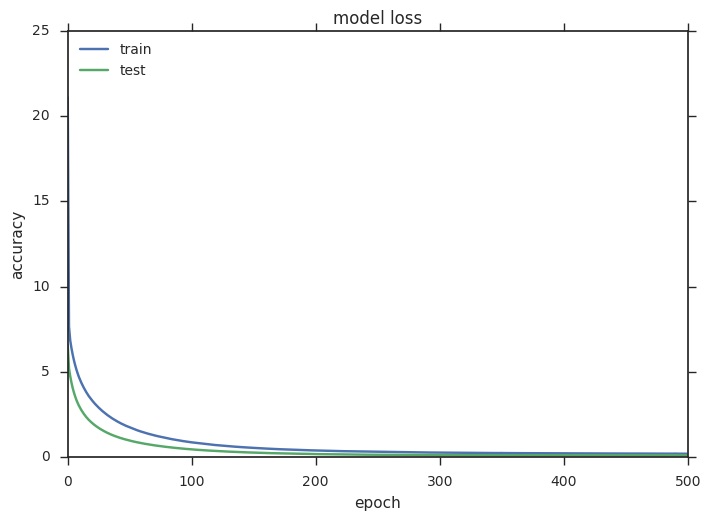

In [6]:
# plot history of loss in training and validation data
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
# list all data in history
print(history.history.keys())

['loss', 'val_loss']


[ 446.64718628  425.23141479  407.80392456 ...,  437.40924072  381.09912109
  420.9815979 ]


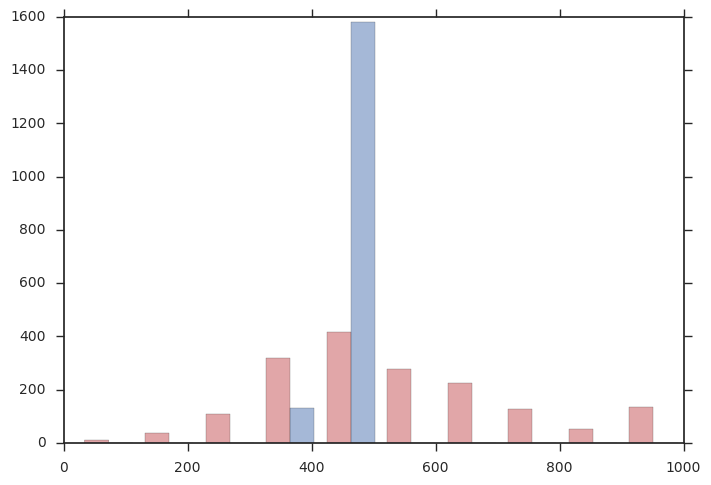

In [8]:
_y = model.predict(X)[:,0]
plot = plt.hist([y, _y], color=['r','b'], alpha=0.5)